In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
import re
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score,\
plot_confusion_matrix, roc_auc_score, roc_curve, auc

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

In [2]:
from utils import evaluate

In [3]:
df = pd.read_csv('../../data/bird_dataset.csv', index_col=0)
df.head()

C:\Users\whitm\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SpecID,PassNonPass,IOCOrder,BLFamilyLatin,BLFamilyEnglish,BLFamSequID,Taxo,Scientific,English,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,Diet-Nect,Diet-Seed,Diet-PlantO,Diet-5Cat,Diet-Source,Diet-Certainty,Diet-EnteredBy,ForStrat-watbelowsurf,ForStrat-wataroundsurf,ForStrat-ground,ForStrat-understory,ForStrat-midhigh,ForStrat-canopy,ForStrat-aerial,PelagicSpecialist,ForStrat-Source,ForStrat-SpecLevel,ForStrat-EnteredBy,Nocturnal,BodyMass-Value,BodyMass-Source,BodyMass-SpecLevel,BodyMass-Comment,Record-Comment,Unnamed: 0.1,English name,Family,Global IUCN Red List Category,endemic_breeding,migratory,africa,antarctica,asia,australasia,caribbean,central_amer,central_asia,europe,high_seas,mid_east,north_amer,oceania,south_amer,agriculture_threat,biological_threat,climate_change_threat,energy_mining_threat,geological_threat,human_intrusions_threat,natural_systems_threat,pollution_threat,res_comm_dev_threat,transportation_threat,invasive_threat,artificial_aquatic,artificial_terrestrial,caves_subterranean,desert,forest,grassland,introduced_vegetation,marine_coastal_supratidal,marine_intertidal,marine_neritic,marine_oceanic,rocky_areas,savanna,shrubland,wetlands_inland
1,37.0,Nonpasseriformes,Rheiformes,Rheidae,Rheas,3.0,BL3,Rhea americana,Greater Rhea,20.0,10.0,10.0,0.0,0.0,0.0,20.0,0.0,20.0,20.0,Omnivore,Ref_1,A,Jennifer,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,Ref_1,1.0,Jessica,0.0,23000.00,Dunning08,1.0,NaN,NaN,2.0,Greater Rhea,Rheidae (Rheas),NT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,38.0,Nonpasseriformes,Rheiformes,Rheidae,Rheas,3.0,BL3,Rhea pennata,Lesser Rhea,20.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,30.0,40.0,PlantSeed,Ref_1,A,Jennifer,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,Ref_1,1.0,Jessica,0.0,23900.00,Dunning08,1.0,NaN,NaN,3.0,Lesser Rhea,Rheidae (Rheas),LC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45.0,Nonpasseriformes,Casuariiformes,Casuariidae,Cassowaries,4.0,BL3,Casuarius casuarius,Southern Cassowary,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0,FruiNect,Ref_1,A,Jennifer,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,Ref_1,1.0,Jessica,0.0,44000.00,Dunning08,1.0,NaN,NaN,52.0,Southern Cassowary,"Casuariidae (Cassowaries, Emus)",LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.0,Nonpasseriformes,Casuariiformes,Casuariidae,Cassowaries,4.0,BL3,Casuarius bennetti,Dwarf Cassowary,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0,FruiNect,Ref_1,B,Jennifer,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,Ref_1,1.0,Jessica,0.0,34999.99,Dunning08,1.0,NaN,NaN,53.0,Dwarf Cassowary,"Casuariidae (Cassowaries, Emus)",LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,47.0,Nonpasseriformes,Casuariiformes,Casuariidae,Cassowaries,4.0,BL3,Casuarius unappendiculatus,Northern Cassowary,20.0,0.0,0.0,0.0,10.0,0.0,60.0,0.0,0.0,10.0,FruiNect,Ref_1,A,Jennifer,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,Ref_1,1.0,Jessica,0.0,46073.85,Dunning08,1.0,NaN,NaN,54.0,Northern Cassowary,"Casuariidae (Cassowaries, Emus)",LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9597 entries, 1 to 9985
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SpecID                         9597 non-null   float64
 1   PassNonPass                    9597 non-null   object 
 2   IOCOrder                       9597 non-null   object 
 3   BLFamilyLatin                  9597 non-null   object 
 4   BLFamilyEnglish                9597 non-null   object 
 5   BLFamSequID                    9597 non-null   float64
 6   Taxo                           9597 non-null   object 
 7   Scientific                     9597 non-null   object 
 8   English                        9597 non-null   object 
 9   Diet-Inv                       9597 non-null   float64
 10  Diet-Vend                      9597 non-null   float64
 11  Diet-Vect                      9597 non-null   float64
 12  Diet-Vfish                     9597 non-null   f

In [5]:
df.columns

Index(['SpecID', 'PassNonPass', 'IOCOrder', 'BLFamilyLatin', 'BLFamilyEnglish',
       'BLFamSequID', 'Taxo', 'Scientific', 'English', 'Diet-Inv', 'Diet-Vend',
       'Diet-Vect', 'Diet-Vfish', 'Diet-Vunk', 'Diet-Scav', 'Diet-Fruit',
       'Diet-Nect', 'Diet-Seed', 'Diet-PlantO', 'Diet-5Cat', 'Diet-Source',
       'Diet-Certainty', 'Diet-EnteredBy', 'ForStrat-watbelowsurf',
       'ForStrat-wataroundsurf', 'ForStrat-ground', 'ForStrat-understory',
       'ForStrat-midhigh', 'ForStrat-canopy', 'ForStrat-aerial',
       'PelagicSpecialist', 'ForStrat-Source', 'ForStrat-SpecLevel',
       'ForStrat-EnteredBy', 'Nocturnal', 'BodyMass-Value', 'BodyMass-Source',
       'BodyMass-SpecLevel', 'BodyMass-Comment', 'Record-Comment',
       'Unnamed: 0.1', 'English name', 'Family',
       'Global IUCN Red List Category', 'endemic_breeding', 'migratory',
       'africa', 'antarctica', 'asia', 'australasia', 'caribbean',
       'central_amer', 'central_asia', 'europe', 'high_seas', 'mid_east',
    

In [6]:
# create df with useful columns
drop_cols = ['SpecID','IOCOrder', 'BLFamilyLatin', 'BLFamilyEnglish', 'BLFamSequID', 'Taxo', 'Scientific', 'English',
             'Diet-Source', 'Diet-EnteredBy', 'ForStrat-Source', 'ForStrat-EnteredBy', 'BodyMass-Source',
             'BodyMass-Comment', 'Record-Comment', 'Unnamed: 0.1', 'English name', 'Family']

bird_df = df.drop(columns=drop_cols)
bird_df.head()

,PassNonPass,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,Diet-Nect,Diet-Seed,Diet-PlantO,Diet-5Cat,Diet-Certainty,ForStrat-watbelowsurf,ForStrat-wataroundsurf,ForStrat-ground,ForStrat-understory,ForStrat-midhigh,ForStrat-canopy,ForStrat-aerial,PelagicSpecialist,ForStrat-SpecLevel,Nocturnal,BodyMass-Value,BodyMass-SpecLevel,Global IUCN Red List Category,endemic_breeding,migratory,africa,antarctica,asia,australasia,caribbean,central_amer,central_asia,europe,high_seas,mid_east,north_amer,oceania,south_amer,agriculture_threat,biological_threat,climate_change_threat,energy_mining_threat,geological_threat,human_intrusions_threat,natural_systems_threat,pollution_threat,res_comm_dev_threat,transportation_threat,invasive_threat,artificial_aquatic,artificial_terrestrial,caves_subterranean,desert,forest,grassland,introduced_vegetation,marine_coastal_supratidal,marine_intertidal,marine_neritic,marine_oceanic,rocky_areas,savanna,shrubland,wetlands_inland
1,Nonpasseriformes,20.0,10.0,10.0,0.0,0.0,0.0,20.0,0.0,20.0,20.0,Omnivore,A,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23000.00,1.0,NT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Nonpasseriformes,20.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,30.0,40.0,PlantSeed,A,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23900.00,1.0,LC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nonpasseriformes,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0,FruiNect,A,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,44000.00,1.0,LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Nonpasseriformes,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0,FruiNect,B,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,34999.99,1.0,LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,Nonpasseriformes,20.0,0.0,0.0,0.0,10.0,0.0,60.0,0.0,0.0,10.0,FruiNect,A,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,46073.85,1.0,LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [7]:
bird_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9597 entries, 1 to 9985
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PassNonPass                    9597 non-null   object 
 1   Diet-Inv                       9597 non-null   float64
 2   Diet-Vend                      9597 non-null   float64
 3   Diet-Vect                      9597 non-null   float64
 4   Diet-Vfish                     9597 non-null   float64
 5   Diet-Vunk                      9597 non-null   float64
 6   Diet-Scav                      9597 non-null   float64
 7   Diet-Fruit                     9597 non-null   float64
 8   Diet-Nect                      9597 non-null   float64
 9   Diet-Seed                      9597 non-null   float64
 10  Diet-PlantO                    9597 non-null   float64
 11  Diet-5Cat                      9597 non-null   object 
 12  Diet-Certainty                 9597 non-null   o

In [8]:
dd_df = bird_df[bird_df['Global IUCN Red List Category'] == 'DD']
dd_df = dd_df.drop(columns='Global IUCN Red List Category')
dd_df.head()

,PassNonPass,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,Diet-Nect,Diet-Seed,Diet-PlantO,Diet-5Cat,Diet-Certainty,ForStrat-watbelowsurf,ForStrat-wataroundsurf,ForStrat-ground,ForStrat-understory,ForStrat-midhigh,ForStrat-canopy,ForStrat-aerial,PelagicSpecialist,ForStrat-SpecLevel,Nocturnal,BodyMass-Value,BodyMass-SpecLevel,endemic_breeding,migratory,africa,antarctica,asia,australasia,caribbean,central_amer,central_asia,europe,high_seas,mid_east,north_amer,oceania,south_amer,agriculture_threat,biological_threat,climate_change_threat,energy_mining_threat,geological_threat,human_intrusions_threat,natural_systems_threat,pollution_threat,res_comm_dev_threat,transportation_threat,invasive_threat,artificial_aquatic,artificial_terrestrial,caves_subterranean,desert,forest,grassland,introduced_vegetation,marine_coastal_supratidal,marine_intertidal,marine_neritic,marine_oceanic,rocky_areas,savanna,shrubland,wetlands_inland
492,Nonpasseriformes,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,10.0,Omnivore,D1,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.39,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1101,Nonpasseriformes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Invertebrate,A,0.0,0.0,70.0,20.0,10.0,0.0,0.0,0.0,1.0,0.0,50.15,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1629,Nonpasseriformes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Invertebrate,B,0.0,0.0,0.0,0.0,10.0,0.0,90.0,0.0,1.0,0.0,22.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1630,Nonpasseriformes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Invertebrate,D1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,1.0,0.0,39.50,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1651,Nonpasseriformes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Invertebrate,D1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,1.0,0.0,14.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
dd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 492 to 9535
Data columns (total 66 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassNonPass                41 non-null     object 
 1   Diet-Inv                   41 non-null     float64
 2   Diet-Vend                  41 non-null     float64
 3   Diet-Vect                  41 non-null     float64
 4   Diet-Vfish                 41 non-null     float64
 5   Diet-Vunk                  41 non-null     float64
 6   Diet-Scav                  41 non-null     float64
 7   Diet-Fruit                 41 non-null     float64
 8   Diet-Nect                  41 non-null     float64
 9   Diet-Seed                  41 non-null     float64
 10  Diet-PlantO                41 non-null     float64
 11  Diet-5Cat                  41 non-null     object 
 12  Diet-Certainty             41 non-null     object 
 13  ForStrat-watbelowsurf      41 non-null     float

In [10]:
bird_df = bird_df.drop(index=dd_df.index)
bird_df['threatened'] = [0.0 if x in ['NT', 'LC'] else 1.0 for x in bird_df['Global IUCN Red List Category']]
bird_df.head()

,PassNonPass,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,Diet-Nect,Diet-Seed,Diet-PlantO,Diet-5Cat,Diet-Certainty,ForStrat-watbelowsurf,ForStrat-wataroundsurf,ForStrat-ground,ForStrat-understory,ForStrat-midhigh,ForStrat-canopy,ForStrat-aerial,PelagicSpecialist,ForStrat-SpecLevel,Nocturnal,BodyMass-Value,BodyMass-SpecLevel,Global IUCN Red List Category,endemic_breeding,migratory,africa,antarctica,asia,australasia,caribbean,central_amer,central_asia,europe,high_seas,mid_east,north_amer,oceania,south_amer,agriculture_threat,biological_threat,climate_change_threat,energy_mining_threat,geological_threat,human_intrusions_threat,natural_systems_threat,pollution_threat,res_comm_dev_threat,transportation_threat,invasive_threat,artificial_aquatic,artificial_terrestrial,caves_subterranean,desert,forest,grassland,introduced_vegetation,marine_coastal_supratidal,marine_intertidal,marine_neritic,marine_oceanic,rocky_areas,savanna,shrubland,wetlands_inland,threatened
1,Nonpasseriformes,20.0,10.0,10.0,0.0,0.0,0.0,20.0,0.0,20.0,20.0,Omnivore,A,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23000.00,1.0,NT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,Nonpasseriformes,20.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,30.0,40.0,PlantSeed,A,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23900.00,1.0,LC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nonpasseriformes,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0,FruiNect,A,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,44000.00,1.0,LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Nonpasseriformes,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0,FruiNect,B,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,34999.99,1.0,LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,Nonpasseriformes,20.0,0.0,0.0,0.0,10.0,0.0,60.0,0.0,0.0,10.0,FruiNect,A,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,46073.85,1.0,LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [11]:
bird_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9556 entries, 1 to 9985
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PassNonPass                    9556 non-null   object 
 1   Diet-Inv                       9556 non-null   float64
 2   Diet-Vend                      9556 non-null   float64
 3   Diet-Vect                      9556 non-null   float64
 4   Diet-Vfish                     9556 non-null   float64
 5   Diet-Vunk                      9556 non-null   float64
 6   Diet-Scav                      9556 non-null   float64
 7   Diet-Fruit                     9556 non-null   float64
 8   Diet-Nect                      9556 non-null   float64
 9   Diet-Seed                      9556 non-null   float64
 10  Diet-PlantO                    9556 non-null   float64
 11  Diet-5Cat                      9556 non-null   object 
 12  Diet-Certainty                 9556 non-null   o

In [12]:
bird_df['threatened'].value_counts()

0.0    8307
1.0    1249
Name: threatened, dtype: int64

In [13]:
X = bird_df.drop(columns=['Global IUCN Red List Category', 'threatened'])
y = bird_df['threatened']

# split into a 10% holdout set
X_t, X_hold, y_t, y_hold = train_test_split(X, y, random_state=42, stratify=y, test_size=0.1)

# split into 75% train, 15% test sets
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, random_state=42, stratify=y_t, test_size=15/90)

## Preprocessing Pipeline

In [14]:
# single numeric column for min max scaling
num_col = ['BodyMass-Value']

# numeric pipeline
num_pipe = Pipeline([('min_max', MinMaxScaler())])


# ForStrat columns
strats = [c for c in df.columns if re.search('ForStrat.+', c)]
strats = strats[:7]

# Diet columns
diets = [c for c in df.columns if re.search('Diet.+', c)]
diets = diets[:10]

# proportional numeric columns
prop_cols = strats + diets

# proportional numeric pipeline
prop_pipe = Pipeline([('div100', FunctionTransformer(lambda x: x/100))])


# categorical columns for OHE
cat_cols = [c for c in X_train.columns if X_train[c].dtype == 'object']

# categorical pipeline
cat_pipe = Pipeline([('ohe', OneHotEncoder())])

In [74]:
# preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[('numerical', num_pipe, num_col),
                                               ('proportional', prop_pipe, prop_cols),
                                               ('categorical', cat_pipe, cat_cols)],
                                 remainder='passthrough')

## Modeling

### Decision Tree

In [75]:
# decision tree pipeline
dt_pipe = Pipeline([('preprocessor', preprocessor),
                   ('dt', DecisionTreeClassifier())])

# relevant scoring metrics
scoring_metrics = ('recall', 'f1')

# cross validation
dt_cv = cross_validate(dt_pipe, X_train, y_train, scoring=scoring_metrics)

print(f"Mean Validation Recall: {np.mean(dt_cv['test_recall']):.3f}")
print(f"Mean Validation f1: {np.mean(dt_cv['test_f1']):.3f}")

Mean Validation Recall: 0.587
Mean Validation f1: 0.583


Training Metrics
Recall: 1.000
f1: 1.000
----
Testing Metrics
Recall: 0.540
f1: 0.546


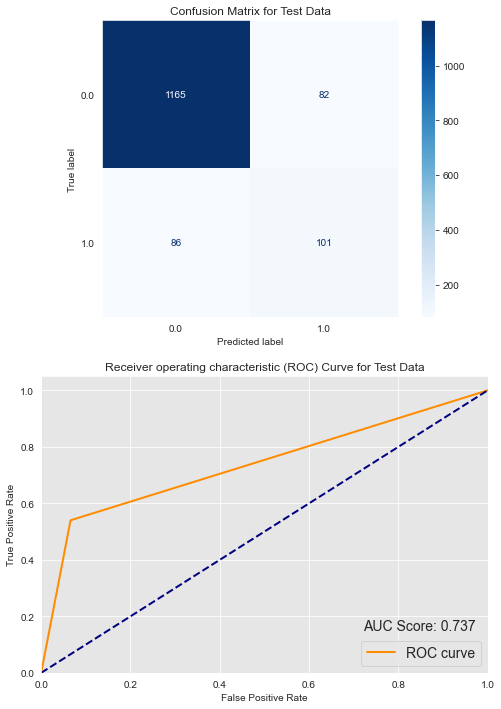

In [76]:
evaluate(dt_pipe, X_train, y_train, X_test, y_test)

In [77]:
# decision tree param grid
dt_grid = {'dt__max_depth': [3, 50, 100],
          'dt__min_samples_split': [2, 5, 10],
          'dt__criterion': ['gini', 'entropy']}

dt_gs = GridSearchCV(estimator=dt_pipe, param_grid=dt_grid, scoring=scoring_metrics, refit='recall')

Training Metrics
Recall: 0.655
f1: 0.655
----
Testing Metrics
Recall: 0.626
f1: 0.613

Best Parameters for Recall
{'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__min_samples_split': 2}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__criterion,param_dt__max_depth,param_dt__min_samples_split,params,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.142681,0.019139,0.046103,0.013721,gini,3,2,"{'dt__criterion': 'gini', 'dt__max_depth': 3, ...",0.654255,0.664894,0.625668,0.625668,0.647059,0.643509,0.015633,1,0.654255,0.654450,0.625668,0.637602,0.670360,0.648467,0.015404,1
1,0.140694,0.025135,0.038270,0.008671,gini,3,5,"{'dt__criterion': 'gini', 'dt__max_depth': 3, ...",0.654255,0.664894,0.625668,0.625668,0.647059,0.643509,0.015633,1,0.654255,0.654450,0.625668,0.637602,0.670360,0.648467,0.015404,1
2,0.165986,0.015672,0.047108,0.010088,gini,3,10,"{'dt__criterion': 'gini', 'dt__max_depth': 3, ...",0.654255,0.664894,0.625668,0.625668,0.647059,0.643509,0.015633,1,0.654255,0.654450,0.625668,0.637602,0.670360,0.648467,0.015404,1
9,0.174869,0.010452,0.050243,0.003742,entropy,3,2,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.654255,0.585106,0.566845,0.625668,0.647059,0.615787,0.034328,4,0.654255,0.609418,0.593838,0.637602,0.670360,0.633095,0.028137,4
10,0.170326,0.016152,0.049117,0.005548,entropy,3,5,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.654255,0.585106,0.566845,0.625668,0.647059,0.615787,0.034328,4,0.654255,0.609418,0.593838,0.637602,0.670360,0.633095,0.028137,4
11,0.168575,0.003714,0.046316,0.007282,entropy,3,10,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.654255,0.585106,0.566845,0.625668,0.647059,0.615787,0.034328,4,0.654255,0.609418,0.593838,0.637602,0.670360,0.633095,0.028137,4
12,0.276892,0.013231,0.048752,0.004639,entropy,50,2,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.585106,0.579787,0.593583,0.588235,0.593583,0.588059,0.005257,7,0.597826,0.572178,0.582677,0.594595,0.611570,0.591769,0.013440,7
15,0.229260,0.041236,0.040906,0.013253,entropy,100,2,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.611702,0.563830,0.593583,0.566845,0.572193,0.581630,0.018285,8,0.603675,0.557895,0.581152,0.565333,0.591160,0.579843,0.016673,9
3,0.273048,0.028529,0.047020,0.006768,gini,50,2,"{'dt__criterion': 'gini', 'dt__max_depth': 50,...",0.558511,0.574468,0.577540,0.614973,0.572193,0.579537,0.018876,9,0.561497,0.563969,0.574468,0.589744,0.579946,0.573925,0.010396,15
6,0.260000,0.011571,0.049968,0.007313,gini,100,2,"{'dt__criterion': 'gini', 'dt__max_depth': 100...",0.563830,0.547872,0.593583,0.625668,0.561497,0.578490,0.027910,10,0.566845,0.540682,0.593583,0.607792,0.575342,0.576849,0.023013,12


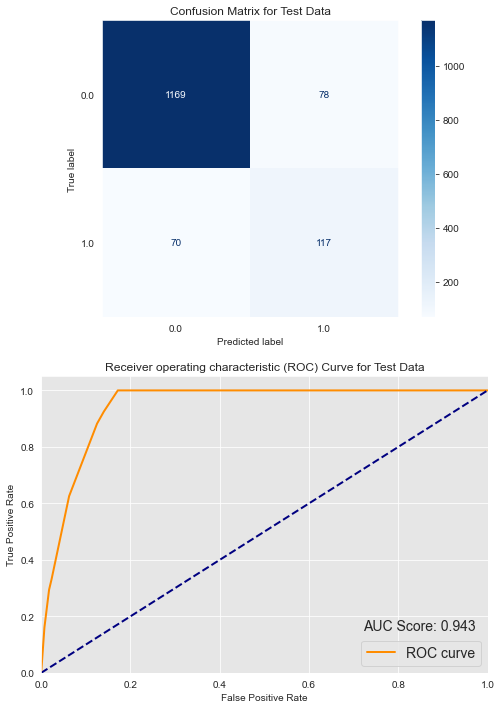

In [78]:
evaluate(dt_gs, X_train, y_train, X_test, y_test, grid_search=True)

### Boosted Tree

In [79]:
# gradient boosting pipeline
gb_pipe = Pipeline([('preprocessor', preprocessor),
                   ('gb', GradientBoostingClassifier())])

# cross validation
gb_cv = cross_validate(dt_pipe, X_train, y_train, scoring=scoring_metrics)

print(f"Mean Validation Recall: {np.mean(gb_cv['test_recall']):.3f}")
print(f"Mean Validation f1: {np.mean(gb_cv['test_f1']):.3f}")

Mean Validation Recall: 0.573
Mean Validation f1: 0.572


Training Metrics
Recall: 0.741
f1: 0.756
----
Testing Metrics
Recall: 0.604
f1: 0.644


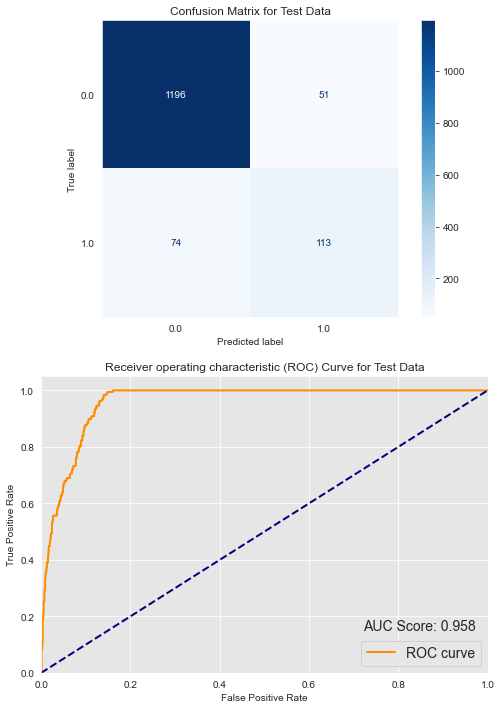

In [80]:
evaluate(gb_pipe, X_train, y_train, X_test, y_test)

In [60]:
gb_pipe['preprocessor'].transformers_[2][1]['ohe'].get_feature_names()

array(['x0_Nonpasseriformes', 'x0_Passeriformes', 'x1_FruiNect',
       'x1_Invertebrate', 'x1_Omnivore', 'x1_PlantSeed',
       'x1_VertFishScav', 'x2_A', 'x2_B', 'x2_C', 'x2_D1', 'x2_D2'],
      dtype=object)

In [66]:
gb_pipe['gb'].feature_importances_

array([4.20164525e-01, 2.40121756e-02, 4.87823925e-02, 1.20587570e-02,
       2.26434871e-02, 2.96703628e-02, 1.88302716e-02, 1.05075034e-02,
       3.54640463e-02, 2.54348083e-02, 4.06676503e-02, 2.15310181e-02,
       1.26123601e-02, 1.62605350e-02, 3.74907727e-02, 1.03090679e-02,
       1.52966581e-02, 2.14314644e-02, 6.21123332e-07, 0.00000000e+00,
       1.63110750e-03, 0.00000000e+00, 4.99834022e-03, 2.36831784e-03,
       1.52565372e-05, 1.31793476e-01, 8.16246777e-03, 1.32886353e-02,
       5.78946617e-03, 8.78445525e-03])

In [73]:
pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.000375,0.0,0.3,0.7,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000316,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000102,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000086,0.0,0.0,0.0,0.8,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000100,0.0,0.0,0.6,0.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,0.000014,0.0,0.0,0.0,0.6,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7162,0.000632,0.0,0.0,0.5,0.3,0.2,0.0,0.0,0.4,0.0,0.1,0.0,0.0,0.0,0.2,0.1,0.2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7163,0.000057,0.0,0.0,0.0,0.8,0.1,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7164,0.000086,0.0,0.0,0.0,0.2,0.2,0.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### KNN

In [23]:
X_train.columns

Index(['PassNonPass', 'Diet-Inv', 'Diet-Vend', 'Diet-Vect', 'Diet-Vfish',
       'Diet-Vunk', 'Diet-Scav', 'Diet-Fruit', 'Diet-Nect', 'Diet-Seed',
       'Diet-PlantO', 'Diet-5Cat', 'Diet-Certainty', 'ForStrat-watbelowsurf',
       'ForStrat-wataroundsurf', 'ForStrat-ground', 'ForStrat-understory',
       'ForStrat-midhigh', 'ForStrat-canopy', 'ForStrat-aerial',
       'PelagicSpecialist', 'ForStrat-SpecLevel', 'Nocturnal',
       'BodyMass-Value', 'BodyMass-SpecLevel', 'endemic_breeding', 'migratory',
       'africa', 'antarctica', 'asia', 'australasia', 'caribbean',
       'central_amer', 'central_asia', 'europe', 'high_seas', 'mid_east',
       'north_amer', 'oceania', 'south_amer', 'agriculture_threat',
       'biological_threat', 'climate_change_threat', 'energy_mining_threat',
       'geological_threat', 'human_intrusions_threat',
       'natural_systems_threat', 'pollution_threat', 'res_comm_dev_threat',
       'transportation_threat', 'invasive_threat', 'artificial_aquatic',
  

In [81]:
# knn on threats
knn_threats = KNeighborsClassifier()

# threats
threats = [c for c in df.columns if re.search('.+threat', c)]

# cross validation
knn_cv = cross_validate(knn_threats, X_train[threats], y_train, scoring=scoring_metrics)

print(f"Mean Validation Recall: {np.mean(knn_cv['test_recall']):.3f}")
print(f"Mean Validation f1: {np.mean(knn_cv['test_f1']):.3f}")

Mean Validation Recall: 0.516
Mean Validation f1: 0.555


Training Metrics
Recall: 0.593
f1: 0.634
----
Testing Metrics
Recall: 0.508
f1: 0.565


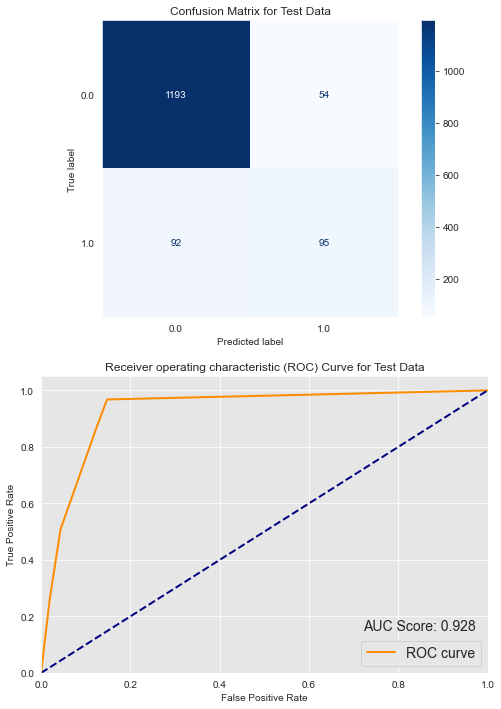

In [33]:
evaluate(knn_threats, X_train[threats], y_train, X_test[threats], y_test)